# Analysis of the parameters estimated

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display
import time
import datetime as dt
import os

In [2]:
# Reading Final Table
df = pd.read_csv('SIRD_Spain.csv')
df

,ISO_code,Continent,Country/Region,Date,Susceptibles Smooth (S),Infected Smooth (I),Recovered Smooth (R),Deaths Smooth (D),Total Population (N),Total Population Without Deahts (N Alive)
0,ESP,Europe,Spain,2020-01-28,4.733261e+07,0.000000,0.000000e+00,0.000000,47332614.0,4.733261e+07
1,ESP,Europe,Spain,2020-01-29,4.733261e+07,0.000000,0.000000e+00,0.000000,47332614.0,4.733261e+07
2,ESP,Europe,Spain,2020-01-30,4.733261e+07,0.000000,0.000000e+00,0.000000,47332614.0,4.733261e+07
3,ESP,Europe,Spain,2020-01-31,4.733261e+07,0.000000,0.000000e+00,0.000000,47332614.0,4.733261e+07
4,ESP,Europe,Spain,2020-02-01,4.733261e+07,0.142857,0.000000e+00,0.000000,47332614.0,4.733261e+07
...,...,...,...,...,...,...,...,...,...,...
782,ESP,Europe,Spain,2022-03-20,3.596521e+07,217216.000000,1.104677e+07,103418.857143,47332614.0,4.722920e+07
783,ESP,Europe,Spain,2022-03-21,3.595083e+07,208981.428571,1.106931e+07,103500.000000,47332614.0,4.722911e+07
784,ESP,Europe,Spain,2022-03-22,3.593386e+07,208352.000000,1.108681e+07,103591.000000,47332614.0,4.722902e+07
785,ESP,Europe,Spain,2022-03-23,3.591690e+07,207272.000000,1.110476e+07,103682.000000,47332614.0,4.722893e+07


In [3]:
# Obtaining dates and SIRD
dates_SIRD = df.values[:,3]

S = df.values[:,4]
I = df.values[:,5]
R = df.values[:,6]
D = df.values[:,7]

len(S), len(I), len(R), len(D), S[0:5], I[0:5]

(787,
 787,
 787,
 787,
 array([47332614.0, 47332614.0, 47332614.0, 47332614.0, 47332613.85714286],
       dtype=object),
 array([0.0, 0.0, 0.0, 0.0, 0.1428571428571428], dtype=object))

In [4]:
# Reading Parameters (LM) Table
df = pd.read_csv('Parameters_LM.csv')
df

,ISO_code,Continent,Country/Region,Date,Mu Raw,Mu Smooth (7 days average),Mu Fixed Raw,Mu Fixed Smooth,Beta,Beta Fixed Smooth,Gamma Raw,Gamma Smooth (7 days average),Gamma Fixed,Gamma Fixed Smooth,R0 Raw,R0 Fixed Smooth (Gamma = 1/14),R0 Fixed Smooth (Mean Gamma)
0,ESP,Europe,Spain,2020-02-03,0.010000,0.010716,0.010000,0.010716,0.045000,0.039941,0.071429,0.039653,0.071429,0.042238,0.647538,0.559171,0.574838
1,ESP,Europe,Spain,2020-02-04,0.010000,0.011303,0.010000,0.011303,0.045000,0.047611,0.071429,0.026832,0.071429,0.032033,0.647538,0.666556,0.685232
2,ESP,Europe,Spain,2020-02-05,0.010000,0.011209,0.010000,0.011209,0.045000,0.058809,0.071429,0.015204,0.071429,0.021829,0.647538,0.823328,0.846397
3,ESP,Europe,Spain,2020-02-06,0.010000,0.011512,0.010000,0.011512,0.045000,0.072383,0.071429,0.003901,0.071429,0.011625,0.647538,1.013361,1.041755
4,ESP,Europe,Spain,2020-02-07,0.007559,0.014458,0.007559,0.014458,0.013622,0.087533,0.004974,-0.008355,0.004974,0.001421,0.196016,1.225468,1.259804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,ESP,Europe,Spain,2022-03-14,0.000762,0.000326,0.000762,0.000351,0.070465,0.068976,0.081893,0.081589,0.081893,0.081589,1.013975,0.965666,0.992723
771,ESP,Europe,Spain,2022-03-15,-0.000068,0.000206,0.000000,0.000242,0.062437,0.070035,0.072432,0.080647,0.072432,0.080647,0.898456,0.980496,1.007969
772,ESP,Europe,Spain,2022-03-16,0.000044,0.000282,0.000044,0.000309,0.049269,0.077156,0.060642,0.081318,0.060642,0.081318,0.708961,1.080186,1.110452
773,ESP,Europe,Spain,2022-03-17,-0.000103,0.000416,0.000000,0.000442,0.034664,0.090718,0.057975,0.083881,0.057975,0.083881,0.498805,1.270056,1.305642


In [5]:
# Obtaining beta and gamma values
dates_param = df.values[:, 3]
beta = df['Beta Fixed Smooth'].values
gamma = df['Gamma Fixed Smooth'].values

len(dates_param), len(beta), len(gamma), beta[0:5], gamma[0:5]

(775,
 775,
 775,
 array([0.03994076, 0.04761113, 0.05880914, 0.07238295, 0.08753341]),
 array([0.04223751, 0.03203343, 0.02182934, 0.01162526, 0.00142118]))

In [6]:
# Reading Parameters (ODEs) Table
df = pd.read_csv('Parameters_ODEs.csv')
df

,ISO_code,Continent,Country/Region,Date,Mu Raw,Mu Smooth (7 days average),Beta Raw,Beta Smooth (7 days average),Beta Fixed Raw (No negative values),Beta Fixed Smooth,R0 Raw,R0 Smooth (7 days average),R0 Fixed Raw (No negative values),R0 Fixed Smooth
0,ESP,Europe,Spain,2020-02-03,0.000000,0.000000,0.000000,0.029762,0.000000,0.029762,0.000000,0.428571,0.000000,0.428571
1,ESP,Europe,Spain,2020-02-04,0.000000,0.000000,0.000000,0.039683,0.000000,0.039683,0.000000,0.571429,0.000000,0.571429
2,ESP,Europe,Spain,2020-02-05,0.000000,0.000000,0.000000,0.049603,0.000000,0.049603,0.000000,0.714286,0.000000,0.714286
3,ESP,Europe,Spain,2020-02-06,0.000000,0.000000,0.000000,0.059524,0.000000,0.059524,0.000000,0.857143,0.000000,0.857143
4,ESP,Europe,Spain,2020-02-07,0.000000,0.000000,0.069444,0.069444,0.069444,0.069444,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,ESP,Europe,Spain,2022-03-19,0.000000,0.000391,0.091245,0.081587,0.091245,0.096251,1.313926,1.174847,1.313926,1.386007
776,ESP,Europe,Spain,2022-03-20,0.001148,0.000391,-0.026991,0.051364,0.000000,0.083216,-0.388671,0.739637,0.000000,1.198304
777,ESP,Europe,Spain,2022-03-21,0.000000,0.000494,-0.018940,0.099766,0.000000,0.127762,-0.272742,1.436628,0.000000,1.839770
778,ESP,Europe,Spain,2022-03-22,0.000000,0.000494,-0.056716,0.096710,0.000000,0.127762,-0.816709,1.392627,0.000000,1.839770


In [7]:
# Obtaining mu values
dates_mu = df['Date'].values
mu = df['Mu Smooth (7 days average)'].values

len(mu), mu[0:5]

(780, array([0., 0., 0., 0., 0.]))

In [8]:
# Getting first day of each different dataframe
index_first_SIRD = np.where(dates_SIRD[0] == dates_SIRD)[0][0]
index_first_param = np.where(dates_param[0] == dates_SIRD)[0][0]
index_first_mu = np.where(dates_mu[0] == dates_SIRD)[0][0]

# Checking if they start the same day, if not get the max value
if((index_first_SIRD == index_first_param) and (index_first_SIRD == index_first_mu)):
    print('All dataframes start in the same day!')
else:
    total_first_index = np.array([index_first_SIRD, index_first_param, index_first_mu])
    common_start = np.max(total_first_index)

    # Adjusting dates and values to a same start date (only SIRD because always gonna have different start)
    dates_SIRD = dates_SIRD[common_start:len(dates_SIRD)]
    S = S[common_start:len(dates_SIRD)]
    I = I[common_start:len(dates_SIRD)]
    R = R[common_start:len(dates_SIRD)]
    D = D[common_start:len(dates_SIRD)]

dates_SIRD[0], dates_param[0], dates_mu[0]

('2020-02-03', '2020-02-03', '2020-02-03')

In [9]:
# Getting last day of each different dataframe
index_last_SIRD = np.where(dates_SIRD[-1] == dates_SIRD)[0][0]
index_last_param = np.where(dates_param[-1] == dates_SIRD)[0][0]
index_last_mu = np.where(dates_mu[-1] == dates_SIRD)[0][0]

# Checking if they finish the same day, if not get the min value
if((index_first_SIRD == index_first_param) and (index_first_SIRD == index_first_mu)):
    print('All dataframes end in the same day!')
else:
    total_last_index = np.array([index_last_SIRD, index_last_param, index_last_mu])
    common_end = np.min(total_last_index) + 1

    # Adjusting dates and values to a same end date
    dates_SIRD = dates_SIRD[0:common_end]
    S = S[0:common_end]
    I = I[0:common_end]
    R = R[0:common_end]
    D = D[0:common_end]
    dates_param = dates_param[0:common_end]
    beta = beta[0:common_end]
    gamma = gamma[0:common_end]
    dates_mu = dates_mu[0:common_end]
    mu = mu[0:common_end]

dates_SIRD[-1], dates_param[-1], dates_mu[-1], len(S), len(I), len(R), len(D), len(beta), len(gamma), len(mu)

('2022-03-18', '2022-03-18', '2022-03-18', 775, 775, 775, 775, 775, 775, 775)

## Infected VS Beta representation

In [10]:
# Import MinMaxScaler for setting the same unit scale
from sklearn.preprocessing import MinMaxScaler

In [11]:
I_shape = np.empty((len(I),1), dtype=object)
beta_shape = np.empty((len(beta),1), dtype=object)

for i in range(0, len(I), 1):
    I_shape[i] = I[i]
    beta_shape[i] = beta[i]

I_shape.shape, beta_shape.shape

((775, 1), (775, 1))

In [12]:
# Infected data scale
scaler_I = MinMaxScaler()
I_scaled = scaler_I.fit_transform(I_shape)

# Beta data scale
scaler_beta = MinMaxScaler()
beta_scaled = scaler_beta.fit_transform(beta_shape)

I_scaled[0:10], beta_scaled[0:10]

(array([[0.00000000e+00],
        [7.86441682e-08],
        [1.57288336e-07],
        [2.35932505e-07],
        [3.14576673e-07],
        [3.14576673e-07],
        [3.93220841e-07],
        [4.71865009e-07],
        [5.50509178e-07],
        [6.29153346e-07]]),
 array([[0.06291372],
        [0.08236484],
        [0.11076157],
        [0.14518308],
        [0.18360275],
        [0.23544878],
        [0.24681605],
        [0.22806676],
        [0.19650718],
        [0.15716172]]))

In [13]:
# Transform 'Date' string format
date_label_VS = []
for i in range(0, len(dates_SIRD), 1):
    date = dt.datetime.strptime(dates_SIRD[i],'%Y-%m-%d').date()
    date_label_VS.append(date.strftime('%d/%m/%y')) 

len(date_label_VS)

775

In [14]:
# Function to plot Infected VS beta
def plot_I_VS_beta(I_scaled, beta_scaled, date_label, interval, title, download):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=interval))
    plt.plot(date_label, I_scaled, linewidth = 1.25, color = 'brown', label = 'I(t) escalado')
    plt.plot(date_label, beta_scaled, linewidth = 1.25, color = 'mediumblue', label = 'β(t) escalado')
    plt.ylabel('Valores normalizados', size = 'medium')
    plt.yticks(fontsize = 'small')
    plt.xlabel('Tiempo (días)', size = 'medium')
    plt.xticks(fontsize = 'small')
    plt.suptitle(title, y = 0, x = 0.54, size = 'large')
    plt.legend(loc='best')
    plt.gcf().autofmt_xdate()
    plt.xlim(left=-10, right=len(date_label)+10)
    
    # Saving plot
    name_file = download + '.png'
    plt.tight_layout()
    plt.savefig(name_file, format='png', dpi=1200, facecolor='white', bbox_inches='tight')

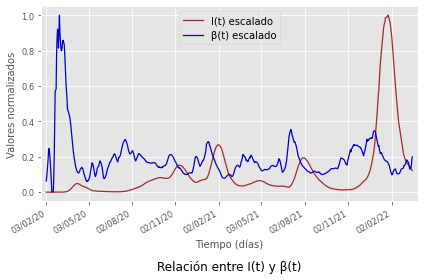

In [15]:
plot_I_VS_beta(I_scaled, beta_scaled, date_label_VS, interval = 3,
               title = 'Relación entre I(t) y β(t)', download = 'I_VS_beta')

## Runge-Kutta Resolution for checking the reliability of the parameters

In [16]:
# SIRD Definition

def SIRD_EDOs(S, I, R, D, mu, beta, gamma):
    EDOs_sol = [None] * 4
    # Solución de dS
    EDOs_sol[0] = -((beta*S*I)/(S+I+R+D))
    # Solución de dI
    EDOs_sol[1] = ((beta*S*I)/(S+I+R+D)) - (gamma*I) - (mu*I)
    # Solución de dR
    EDOs_sol[2] = (gamma*I)
    # Solución de dD
    EDOs_sol[3] = (mu*I)
    return(EDOs_sol)

In [17]:
# Function for resolution day by day with RK

def RK_resolution(S_initial, I_initial, R_initial, D_initial, beta_initial, gamma_initial, mu_initial, h):
    
    time = np.arange(0, 1+h, h)  # Time scale in the sub-intervals
    
    # Final result vectors definition
    # The extension "_K" is for data calculated with the Runge-Kutta method
    S_SIRD_K = np.empty(len(time), dtype = float)
    S_SIRD_K[0] = S_initial
    I_SIRD_K = np.empty(len(time), dtype = float)
    I_SIRD_K[0] = I_initial
    R_SIRD_K = np.empty(len(time), dtype = float)
    R_SIRD_K[0] = R_initial
    D_SIRD_K = np.empty(len(time), dtype = float)
    D_SIRD_K[0] = D_initial
    
    # RK resolution for a specific number of days
    for n in range(1, len(time)):
        
        # First Step of RK4 method
        K1 = SIRD_EDOs(S_SIRD_K[n-1], I_SIRD_K[n-1], R_SIRD_K[n-1], D_SIRD_K[n-1],
                       mu_initial, beta_initial, gamma_initial)
        # Second Step of RK4 method
        K1_S = K1[0]; K1_I = K1[1]; K1_R = K1[2]; K1_D = K1[3]
        K2 = SIRD_EDOs(S_SIRD_K[n-1] + ((h/2)*K1_S), I_SIRD_K[n-1] + ((h/2)*K1_I),
                       R_SIRD_K[n-1] + ((h/2)*K1_R), D_SIRD_K[n-1] + ((h/2)*K1_D),
                       mu_initial, beta_initial, gamma_initial)
        # Third Step of RK4 method
        K2_S = K2[0]; K2_I = K2[1]; K2_R = K2[2]; K2_D = K2[3]
        K3 = SIRD_EDOs(S_SIRD_K[n-1] + ((h/2)*K2_S), I_SIRD_K[n-1] + ((h/2)*K2_I),
                       R_SIRD_K[n-1] + ((h/2)*K2_R), D_SIRD_K[n-1] + ((h/2)*K2_D),
                       mu_initial, beta_initial, gamma_initial)
        # Fourth Step of RK4 method
        K3_S = K3[0]; K3_I = K3[1]; K3_R = K3[2]; K3_D = K3[3]
        K4 = SIRD_EDOs(S_SIRD_K[n-1] + (h*K3_S), I_SIRD_K[n-1] + (h*K3_I), 
                       R_SIRD_K[n-1] + (h*K3_R), D_SIRD_K[n-1] + (h*K3_D),
                       mu_initial, beta_initial, gamma_initial)
        # Solution
        K4_S = K4[0]; K4_I = K4[1]; K4_R = K4[2]; K4_D = K4[3]
        S_SIRD_K[n] = S_SIRD_K[n-1] + ((h/6)*(K1_S + 2*K2_S + 2*K3_S + K4_S))
        I_SIRD_K[n] = I_SIRD_K[n-1] + ((h/6)*(K1_I + 2*K2_I + 2*K3_I + K4_I))
        R_SIRD_K[n] = R_SIRD_K[n-1] + ((h/6)*(K1_R + 2*K2_R + 2*K3_R + K4_R))
        D_SIRD_K[n] = D_SIRD_K[n-1] + ((h/6)*(K1_D + 2*K2_D + 2*K3_D + K4_D))
    
    # Save the result for the next day (last value of the array)
    S_Solution_Next = S_SIRD_K[-1]
    I_Solution_Next = I_SIRD_K[-1]
    R_Solution_Next = R_SIRD_K[-1]
    D_Solution_Next = D_SIRD_K[-1]
    
    return(S_Solution_Next, I_Solution_Next, R_Solution_Next, D_Solution_Next)

In [18]:
# Complete resolution
S_estimated = []
I_estimated = []
R_estimated = []
D_estimated = []

# Loop that will estimate from the second day to the last day: the first day can not be estimated
for i in range(0, len(dates_SIRD)-1, 1):
    
    # Initial values and parameters
    S_initial = S[i]
    I_initial = I[i]
    R_initial = R[i]
    D_initial = D[i]
    beta_initial = beta[i]
    gamma_initial = gamma[i]
    mu_initial = mu[i]
    
    # Resolution for the next day
    S_next, I_next, R_next, D_next = RK_resolution(S_initial, I_initial, R_initial, D_initial, 
                                                   beta_initial, gamma_initial, mu_initial, h = 0.20)
    
    # Saving the results
    S_estimated.append(S_next)
    I_estimated.append(I_next)
    R_estimated.append(R_next)
    D_estimated.append(D_next)

In [19]:
# Transform 'Date' string format
date_label = []
for i in range(1, len(dates_SIRD), 1):
    date = dt.datetime.strptime(dates_SIRD[i],'%Y-%m-%d').date()
    date_label.append(date.strftime('%d/%m/%y')) 

len(date_label)

774

In [20]:
# Function to plot Infected
def plot_I(I_real, I_est, date_label, interval, title, x_val, download):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=interval))
    plt.plot(date_label, I_real, linewidth = 1.25, color = 'black', label = 'I(t) Oficial')
    plt.plot(date_label, I_est, '--', linewidth = 1.25, color = 'orangered', label = 'I(t) Estimado')
    plt.ylabel('Nº Infectados Activos', size = 'medium')
    plt.yticks(fontsize = 'small')
    plt.xlabel('Tiempo (días)', size = 'medium')
    plt.xticks(fontsize = 'small')
    plt.suptitle(title, y = 0, x = x_val, size = 'large')
    plt.legend(loc='best')
    plt.gcf().autofmt_xdate()
    plt.xlim(left=-10, right=len(date_label)+10)
    
    # Saving plot
    name_file = download + '.png'
    plt.tight_layout()
    plt.savefig(name_file, format='png', dpi=1200, facecolor='white', bbox_inches='tight')

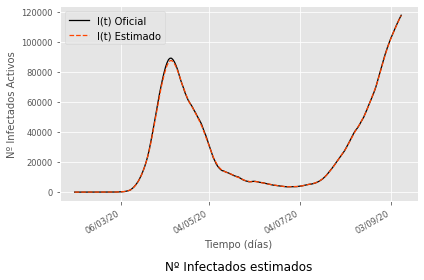

In [21]:
# Infected Representation
plot_I(I[1:221], I_estimated[0:220], date_label[0:220], interval = 2, 
       title = 'Nº Infectados estimados', x_val = 0.56, download = '220_Days_I_RK_Estimation')

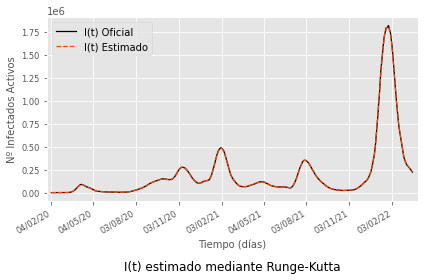

In [22]:
# Infected Representation
plot_I(I[1:len(I)], I_estimated, date_label, interval = 3, 
       title = 'I(t) estimado mediante Runge-Kutta', x_val = 0.545, download = 'I_RK_Estimation')

In [23]:
# Function to plot Susceptibles
def plot_S(S_real, S_est, date_label, interval, title, x_val, download):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=interval))
    plt.plot(date_label, S_real, linewidth = 1.25, color = 'black', label = 'S(t) Oficial')
    plt.plot(date_label, S_est, '--', linewidth = 1.25, color = 'dodgerblue', label = 'S(t) Estimado')
    plt.ylabel('Nº Susceptibles', size = 'medium')
    plt.yticks(fontsize = 'small')
    plt.xlabel('Tiempo (días)', size = 'medium')
    plt.xticks(fontsize = 'small')
    plt.suptitle(title, y = 0, x = x_val, size = 'large')
    plt.legend(loc='best')
    plt.gcf().autofmt_xdate()
    plt.xlim(left=-10, right=len(date_label)+10)
    
    # Saving plot
    name_file = download + '.png'
    plt.tight_layout()
    plt.savefig(name_file, format='png', dpi=1200, facecolor='white', bbox_inches='tight')

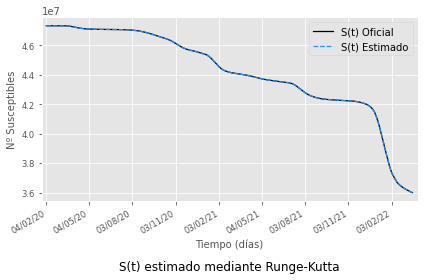

In [24]:
# Susceptibles Representation
plot_S(S[1:len(S)], S_estimated, date_label, interval = 3, 
       title = 'S(t) estimado mediante Runge-Kutta', x_val = 0.54, download = 'S_RK_Estimation')

In [25]:
# Function to plot Recovered
def plot_R(R_real, R_est, date_label, interval, title, x_val, download):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=interval))
    plt.plot(date_label, R_real, linewidth = 1.25, color = 'black', label = 'R(t) Real')
    plt.plot(date_label, R_est, '--', linewidth = 1.25, color = 'limegreen', label = 'R(t) Estimado')
    plt.ylabel('Nº Recuperados', size = 'medium')
    plt.yticks(fontsize = 'small')
    plt.xlabel('Tiempo (días)', size = 'medium')
    plt.xticks(fontsize = 'small')
    plt.suptitle(title, y = 0, x = x_val, size = 'large')
    plt.legend(loc='best')
    plt.gcf().autofmt_xdate()
    plt.xlim(left=-10, right=len(date_label)+10)
    
    # Saving plot
    name_file = download + '.png'
    plt.tight_layout()
    plt.savefig(name_file, format='png', dpi=1200, facecolor='white', bbox_inches='tight')

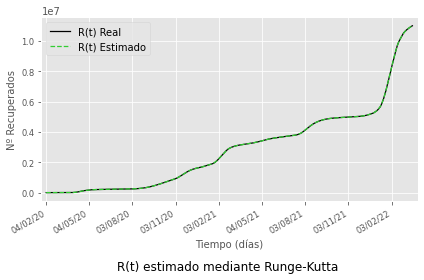

In [26]:
# Recovered Representation
plot_R(R[1:len(R)], R_estimated, date_label, interval = 3,
       title = 'R(t) estimado mediante Runge-Kutta', x_val = 0.535, download = 'R_RK_Estimation')

In [27]:
# Function to plot Deaths
def plot_D(D_real, D_est, date_label, interval, title, x_val, download):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=interval))
    plt.plot(date_label, D_real, linewidth = 1.25, color = 'black', label = 'D(t) Oficial')
    plt.plot(date_label, D_est, '--', linewidth = 1.25, color = 'indianred', label = 'D(t) Estimado')
    plt.ylabel('Nº Muertos', size = 'medium')
    plt.yticks(fontsize = 'small')
    plt.xlabel('Tiempo (días)', size = 'medium')
    plt.xticks(fontsize = 'small')
    plt.title(title, size = 'large')
    plt.suptitle(title, y = 0, x = x_val, size = 'large')
    plt.legend(loc='best')
    plt.gcf().autofmt_xdate()
    plt.xlim(left=-10, right=len(date_label)+10)
    
    # Saving plot
    name_file = download + '.png'
    plt.tight_layout()
    plt.savefig(name_file, format='png', dpi=1200, facecolor='white', bbox_inches='tight')

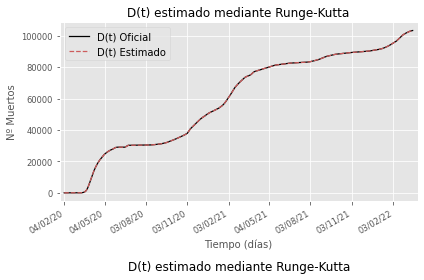

In [28]:
# Deaths Representation
plot_D(D[1:len(D)], D_estimated, date_label, interval = 3,
       title = 'D(t) estimado mediante Runge-Kutta', x_val = 0.563, download = 'D_RK_Estimation')

## Basic Reproduction Number Representation

In [29]:
# R0 calculation
R0_temp = np.empty(len(beta), dtype=float)
R0_fixed = np.empty(len(beta), dtype=float)

for i in range(0, len(beta), 1):
    R0_temp[i] = beta[i]/gamma[i]  # R0 with gamma(t)
    R0_fixed[i] = beta[i]/(np.mean(gamma)+mu[i])  # R0 with mean gamma (~1/14)

In [30]:
# Import R0 data from OWID (https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=2020-03-01..latest&facet=none&pickerSort=desc&pickerMetric=total_cases&hideControls=true&Metric=Reproduction+rate&Interval=7-day+rolling+average&Relative+to+Population=false&Color+by+test+positivity=false&country=~ESP)
df = pd.read_excel('Spain_OWID.xlsx')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,ESP,Europe,Spain,2020-02-01,1,1.0,NaN,NaN,NaN,NaN,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN
1,ESP,Europe,Spain,2020-02-02,1,0.0,NaN,NaN,NaN,NaN,...,27.4,31.4,NaN,2.97,83.56,0.904,-3045.8,-5.97,-0.77,-65.157477
2,ESP,Europe,Spain,2020-02-03,1,0.0,NaN,NaN,NaN,NaN,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN
3,ESP,Europe,Spain,2020-02-04,1,0.0,NaN,NaN,NaN,NaN,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN
4,ESP,Europe,Spain,2020-02-05,1,0.0,NaN,NaN,NaN,NaN,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,ESP,Europe,Spain,2022-03-20,11324637,0.0,14380.429,101703.0,0.0,81.143,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN
779,ESP,Europe,Spain,2022-03-21,11324637,0.0,14380.429,101703.0,0.0,81.143,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN
780,ESP,Europe,Spain,2022-03-22,11378784,54147.0,16963.429,102053.0,350.0,91.000,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN
781,ESP,Europe,Spain,2022-03-23,11378784,NaN,NaN,102053.0,NaN,NaN,...,27.4,31.4,NaN,2.97,83.56,0.904,NaN,NaN,NaN,NaN


In [31]:
# Getting dates and R0 values from OWID
dates_OWID = df['date'].values
R0_OWID = df['reproduction_rate'].values

len(dates_OWID), len(R0_OWID)

(783, 783)

In [32]:
# Transforming the 'date' format to string
dates_OWID = np.datetime_as_string(dates_OWID, timezone='UTC')

for i in range(0, len(dates_OWID), 1):
    dates_OWID[i] = dates_OWID[i][0:10]

dates_OWID[0:10]

array(['2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
       '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
       '2020-02-09', '2020-02-10'], dtype='<U48')

In [33]:
# Getting the first not 'nan' value to find the index and the initial day since R0 is registered
first_notnan = R0_OWID[np.isfinite(R0_OWID)][0]
first_val = np.where(first_notnan == R0_OWID)[0][0]

# Getting the last value from the day range of the parameters
last_val = np.where(dates_SIRD[-1] == dates_OWID)[0][0] + 1

# Transforming the dates
dates_OWID_upd = dates_OWID[first_val:last_val]
R0_OWID_upd= R0_OWID[first_val:last_val]

len(dates_OWID_upd), len(R0_OWID_upd), dates_OWID_upd[0:3], dates_OWID_upd[-3:]

(746,
 746,
 array(['2020-03-03', '2020-03-04', '2020-03-05'], dtype='<U48'),
 array(['2022-03-16', '2022-03-17', '2022-03-18'], dtype='<U48'))

In [34]:
# Obtaining the first day from SIRD calculated data
idx_SIRD = np.where(dates_OWID_upd[0] == dates_SIRD)[0][0]
idx_SIRD

29

In [35]:
# Transform 'Date' string format
date_label_R0 = []
for i in range(0, len(dates_SIRD), 1):
    date = dt.datetime.strptime(dates_SIRD[i],'%Y-%m-%d').date()
    date_label_R0.append(date.strftime('%d/%m/%y')) 

# Adjusting to have the same initial day
date_label_R0 = date_label_R0[idx_SIRD:]

In [36]:
date_label_R0[0], date_label_R0[-1]

('03/03/20', '18/03/22')

In [37]:
# Mean R0 value
print(np.mean(R0_fixed[idx_SIRD:]))

mean_R0 = np.round(np.mean(R0_fixed[idx_SIRD:]), 2)
mean_R0

1.2280492995194203


1.23

In [38]:
# Function to plot R0
def plot_R0(R0_real, R0_est, date_label, interval, title, download):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=interval))
    plt.plot(date_label, R0_real, '--', linewidth = 1.25, color = 'black', label = '$R_{0}$ publicado en OWID')
    plt.plot(date_label, R0_est, linewidth = 1.25, color = 'blueviolet', label = '$R_{0}$ estimado con β(t) y γ~1/14')
    plt.axhline(np.mean(R0_est), color='maroon', linestyle='dotted', linewidth = 0.75, label = "Promedio $R_{0}$ estimado$=1.23$")
    plt.ylabel('Valor de $R_{0}$', size = 'medium')
    plt.yticks(fontsize = 'small')
    plt.xlabel('Tiempo (días)', size = 'medium')
    plt.xticks(fontsize = 'small')
    # plt.title(title, size = 'large')
    plt.suptitle(title, y = 0, x = 0.537, size = 'large')
    plt.legend(loc='best')
    plt.gcf().autofmt_xdate()
    plt.xlim(left=-10, right=len(date_label)+10)
    
    # Saving plot
    name_file = download + '.png'
    plt.tight_layout()
    plt.savefig(name_file, format='png', dpi=1200, facecolor='white', bbox_inches='tight')

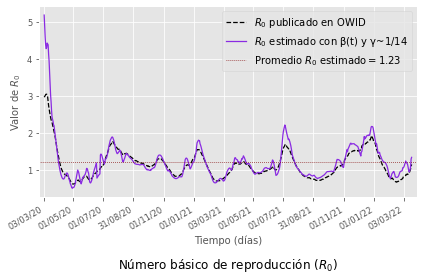

In [39]:
# R0 representation
plot_R0(R0_OWID_upd, R0_fixed[idx_SIRD:], date_label_R0, interval = 2,
        title = 'Número básico de reproducción ($R_{0}$)', download = 'R0_Spain')